In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv("hmeq_SMOTE.csv")

In [3]:
df.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,TARGET
0,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.000000,34.818262,1,0,1,0,0,0,1
1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.000000,34.818262,1,0,1,0,0,0,1
2,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.000000,34.818262,1,0,1,0,0,0,1
3,1500,65019.0,89235.5,7.0,0.0,0.0,173.466667,0.0,21.296096,34.818262,0,0,1,0,0,0,1
4,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.000000,34.818262,1,1,0,0,0,0,0


In [4]:
X = df.drop('TARGET',axis=1)
y = df['TARGET']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [6]:
scaler = StandardScaler()

In [7]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [8]:
svc = SVC()

In [9]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [10]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [22]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

In [26]:
grid_pred = grid.predict(scaled_X_test)

In [28]:
confusion_matrix(y_test,grid_pred)

array([[413,  51],
       [ 71, 420]], dtype=int64)

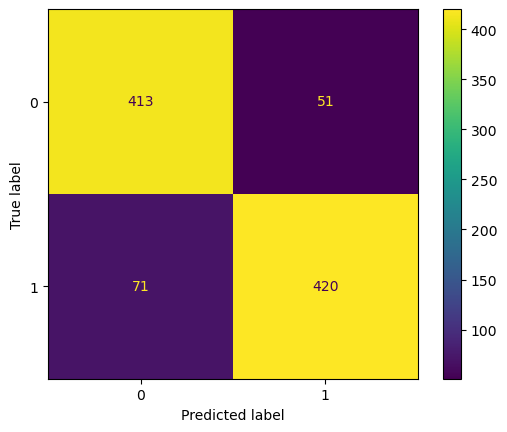

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, grid_pred)

In [30]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       464
           1       0.89      0.86      0.87       491

    accuracy                           0.87       955
   macro avg       0.87      0.87      0.87       955
weighted avg       0.87      0.87      0.87       955



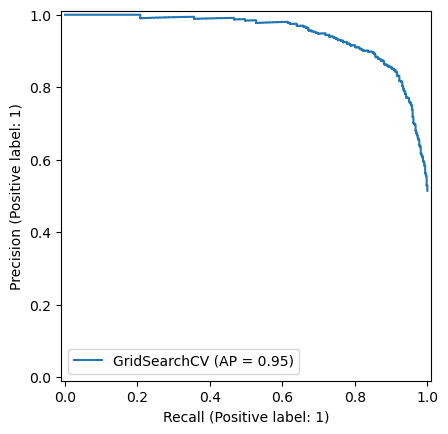

In [34]:
PrecisionRecallDisplay.from_estimator(grid, scaled_X_test, y_test)

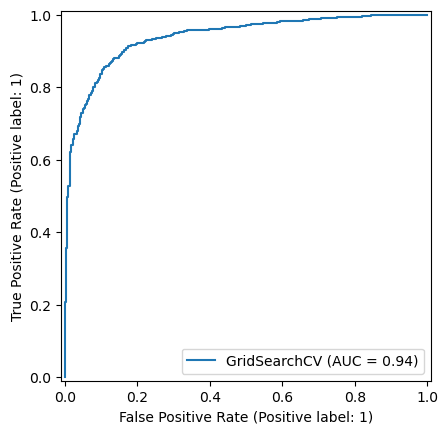

In [38]:
RocCurveDisplay.from_estimator(grid, scaled_X_test, y_test)